# Наивен Бејесов алгоритам

In [14]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('l3o_Y5f4UnM')

## Референци
- [Упатство за инсталирање на потребните библиотеки и екстензии](https://docs.google.com/presentation/d/1tnoeNF_ge9KK_ovTF7xgKVB64ltuV27IPShk3ddSK5w/edit#slide=id.ga20dadbc8e_0_0)
- [Објаснување за Наивен Бејесов алгоритам - Џош Страмер](https://www.youtube.com/watch?v=O2L2Uv9pdDA)
- [За Бејесовата теорема - Дерек Милер](https://www.youtube.com/watch?v=R13BD8qKeTg)
- [За Бејесовата теорема - Грант Сандерсон](https://www.youtube.com/watch?v=HZGCoVF3YvM)


Бејесов класификатор е алгоритам за класификација кој на некој начин ја користи [Бејесовата теорема](https://en.wikipedia.org/wiki/Bayes%27_theorem) за да класифицира. Наивен Бејесов класификатор е Бејесов класификатор кој моделира независност помеѓу признаците (карактеристиките) во податочното множество. Објаснување за алгоритамот ќе најдете во книгата на професорката, а следува код кој ја имплементира функцијата од книгата.

Нека е дадена табела `table`. Последната колона `y` е излезна колона, а сите други `f` колони се признаци.

In [2]:
table = [
#    f1  f2  f3  f4   y
    [ 0,  1,  1,  0,  1],
    [ 0,  0,  1,  1,  1],
    [ 1,  0,  1,  0,  1],
    [ 0,  0,  1,  1,  1],
    [ 0,  0,  0,  1,  1],
    [ 1,  0,  0,  1,  0],
    [ 1,  1,  0,  1,  0],
    [ 1,  0,  0,  0,  0],
    [ 1,  1,  0,  1,  0],
    [ 1,  0,  1,  1,  0]
]
table

[[0, 1, 1, 0, 1],
 [0, 0, 1, 1, 1],
 [1, 0, 1, 0, 1],
 [0, 0, 1, 1, 1],
 [0, 0, 0, 1, 1],
 [1, 0, 0, 1, 0],
 [1, 1, 0, 1, 0],
 [1, 0, 0, 0, 0],
 [1, 1, 0, 1, 0],
 [1, 0, 1, 1, 0]]

За да класифицираме даден податок, ќе ја пресметаме веројатноста тој податок да припаѓа на секоја можна класа. Потоа ќе ги споредиме тие веројатности и влезниот податок ќе го класифицираме дека припаѓа во онаа класа за која сме пресметале најголема веројатност.

При пресметката на гореспоменатите веројатности, лесно може да се заклучи дека сите имаат ист заеднички именител во дробниот израз. Тој именител е нормализаторот од Бејесовата теорема. Доколку целта ни е само да класифицираме, нема потреба да ја пресметуваме точната веројатност, туку ќе ја пресметаме веројатноста без тој нормализатор. Во овој случај зборуваме за веродостојност наместо веројатност.

Функцијата `r()` е функцијата $R$ од книгата на професорката.

In [24]:
def r(feature_x_index, value, output_class):
    #  number of rows where column y equals output_class
    a = sum([output_class == row[-1] for row in table])
    #  number of rows where column y equals output_class and feature_x equals value
    b = sum([output_class == row[-1] and row[feature_x_index-1] == value for row in table])
    return b / a

r(2, 0, 1)

0.8

Да речеме дека имаме влезен податок `0011`. Треба да го класифицираме во која група спаѓа, односно да пресметаме дали излезот за овој податок е 0 или 1. Ќе ја користиме дадената табела `table`.

Прво ќе ја пресметаме веродостојноста излезот за дадениот податок да има вредност 0. Тоа ќе го пресметаме како $$ S(0) = R_1(0, 0) R_2(0, 0) R_3(1, 0) R_4(1, 0) $$
каде $R_a(b, c)$ ја пресметува застапеноста на податоците каде излез е `c`, а признакот `f_a` има вредност `b`, во податоците каде излез е `c`. На овој начин секоја вредност ја пресметуваме статистички. Преку код ова ќе го запишеме како `r(a, b, c)`.

In [25]:
s_0 = r(1, 0, 0) * r(2, 0, 0) * r(3, 1, 0) * r(4, 1, 0)
s_0

0.0

Потоа ќе ја пресметаме веродостојноста излезот за дадениот податок да има вредност 1. Тоа ќе го пресметаме како $$ S(1) = R_1(0, 1) R_2(0, 1) R_3(1, 1) R_4(1, 1) $$.

In [26]:
s_1 = r(1, 0, 1) * r(2, 0, 1) * r(3, 1, 1) * r(4, 1, 1)
s_1

0.3072000000000001

$S(1) > S(0)$, па заклучуваме дека излезот за дадениот податок е 1. 

## Задача за самостојна работа

Воведете лапласова корекција за да ги избегнеме случаите кога во нашето податочно множество немаме податок дека се случил некој настан кој може да се случи, односно некоја вредност $R_a(b, c) = 0$, како што е дадено во примерот погоре.

## Наивен Бејесов алгоритам преку библиотеката `scikit-learn`

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [3]:
data = open('data/вести.txt').read().lower().split('\n')
titles = [d.lstrip('naslov:').strip() for d in data if d.startswith('naslov')]
text_bodies = [d.lstrip('tekst:').strip() for d in data if d.startswith('tekst')]
classes = [d.lstrip('klasa:').strip() for d in data if d.startswith('klasa')]

In [4]:
titles[:10]

['николовски: државниот ревизор ги потврди сите злоупотреби што ги објавивме',
 'дом со иницијатива за спас на водно',
 'нова цена на струјата',
 'загина 20-годишна жителка на мала речица во тешка сообраќајна несреќа на локалниот пат тетово-требош',
 'иванов без коментар од каде му се податоците за предистражните постапки на сјо',
 'опозицијата со кризна стратегија , власта со акциски план',
 'едно лице загина во сообраќајка',
 'честитка од комисијата за верски заедници за почетокот на рамазанските пости',
 'проект „чиста околина“ за светскиот ден на животна средина',
 'хуманитарен „светски пикник“ во градски парк']

In [5]:
texts = []
for title, text_body in zip(titles, text_bodies):
    texts.append(''.join(bukva for bukva in title + ' ' + text_body if bukva in 'абвгдѓежзѕијклљмнњопрстќуфхцчџш '))

In [6]:
train_dataset, test_dataset, train_labels, test_labels = train_test_split(texts, classes, test_size=0.25, random_state=161)

In [7]:
train_labels[:20]

['svet',
 'makedonija',
 'kultura',
 'kultura',
 'svet',
 'kultura',
 'svet',
 'svet',
 'svet',
 'makedonija',
 'makedonija',
 'svet',
 'sport',
 'svet',
 'sport',
 'makedonija',
 'sport',
 'svet',
 'svet',
 'sport']

In [8]:
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB(alpha=1e-3)),
])

In [9]:
clf.fit(train_dataset, train_labels)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB(alpha=0.001))])

In [10]:
y_pred = clf.predict(test_dataset)

In [11]:
y_pred_train = clf.predict(train_dataset)

In [12]:
print('Accuracy Score on train data: ', accuracy_score(y_true=train_labels, y_pred=y_pred_train))
print('Accuracy Score on test data: ', accuracy_score(y_true=test_labels, y_pred=y_pred))

Accuracy Score on train data:  0.9987484355444305
Accuracy Score on test data:  0.9536921151439299


In [1]:
test_labels

NameError: name 'test_labels' is not defined

In [54]:
import numpy as np

In [65]:
a = np.array(test_labels)[y_pred != test_labels]

In [66]:
b = np.array(y_pred)[y_pred != test_labels]

In [67]:
for z in zip(a, b):
    print(z)

('makedonija', 'svet')
('svet', 'makedonija')
('makedonija', 'kultura')
('makedonija', 'svet')
('svet', 'kultura')
('sport', 'svet')
('makedonija', 'kultura')
('makedonija', 'svet')
('sport', 'makedonija')
('kultura', 'makedonija')
('makedonija', 'kultura')
('makedonija', 'svet')
('sport', 'kultura')
('makedonija', 'kultura')
('svet', 'makedonija')
('svet', 'makedonija')
('kultura', 'makedonija')
('sport', 'makedonija')
('svet', 'kultura')
('kultura', 'makedonija')
('makedonija', 'svet')
('kultura', 'makedonija')
('sport', 'svet')
('svet', 'makedonija')
('kultura', 'makedonija')
('svet', 'makedonija')
('sport', 'svet')
('kultura', 'makedonija')
('makedonija', 'svet')
('sport', 'kultura')
('svet', 'makedonija')
('kultura', 'svet')
('kultura', 'makedonija')
('sport', 'svet')
('makedonija', 'kultura')
('sport', 'kultura')
('kultura', 'makedonija')


In [60]:
np.array(test_dataset)[y_pred != test_labels][:5]

array(['чешка амбасада  чешките државјани не биле протерани од македонија и сега се во чешкачешките државјани за кои некои медиуми објавија дека се протерани од земјата се наоѓаат во чешка но македонската граница ја поминале без проблем тврат од чешката амбасада во скопје повикувајќи се на извори од мвр во телефонски разговор за  вести велат не сакаме да ја коментираме информацијата која излезе во некои од медиумите за да не бидеме погрешно сфатени дека вршиме притисок врз слободата на говор во медиумите сепак од мвр добивме информација дека немало таков случај а државјаните на чешка за кои се пишуваше мирно и без никакви проблеми ја поминале македонската граница мвр исто така веќе ја демантираше информацијата на медиумите кои ја објавија веста и потврдија дека не бил регистриран таков случај информацијата за протераните чеси превземајќи ја од македонските медиуми ја објавија и дел од медиумите во чешка повикувајќи се на тие извори пишуваа дека наводно овие лица биле инфилтрирани во пр

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer

# Assume that you have a list of news articles called "articles" and a corresponding list of labels called "labels"

# First, we'll use the CountVectorizer to convert the articles into numerical feature vectors
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(test_dataset)

# Now we'll create a decision tree classifier and fit it to the training data
classifier = DecisionTreeClassifier()
classifier.fit(X, test_labels)

# Now we can use the classifier to predict the category of a new, unseen news article
new_article = "Скопје и натаму во трка со најзагадените градови во светот. Главниот град се искачи на 7-мото место, во друштво со градови од Индија и Кина. И додека скопјани се молат ветерот да го исчисти воздухот, на Градот Скопје загадувањето не му пречи, па ."
prediction = classifier.predict(vectorizer.transform([new_article]))
print(prediction)

['sport']


In [83]:
vectorizer

CountVectorizer()

In [86]:
inverted_d = {value: key for key, value in vectorizer.vocabulary_.items()}

In [95]:
feature_names = [x[1] for x in sorted(inverted_d.items())]

In [73]:
from sklearn import tree

In [97]:
classifier.classes_

array(['kultura', 'makedonija', 'sport', 'svet'], dtype='<U10')

[Text(0.671875, 0.9, 'фестивалот <= 0.5\ngini = 0.749\nsamples = 799\nvalue = [202, 188, 196, 213]'),
 Text(0.46875, 0.7, 'дека <= 0.5\ngini = 0.744\nsamples = 735\nvalue = [139, 187, 196, 213]'),
 Text(0.25, 0.5, 'победа <= 0.5\ngini = 0.685\nsamples = 343\nvalue = [91, 52, 155, 45]'),
 Text(0.125, 0.3, 'лигата <= 0.5\ngini = 0.72\nsamples = 291\nvalue = [91, 52, 104, 44]'),
 Text(0.0625, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.3, 'прелиминарни <= 0.5\ngini = 0.038\nsamples = 52\nvalue = [0, 0, 51, 1]'),
 Text(0.3125, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.1, '\n  (...)  \n'),
 Text(0.6875, 0.5, 'иванов <= 0.5\ngini = 0.672\nsamples = 392\nvalue = [48, 135, 41, 168]'),
 Text(0.625, 0.3, 'македонија <= 0.5\ngini = 0.665\nsamples = 347\nvalue = [48, 90, 41, 168]'),
 Text(0.5625, 0.1, '\n  (...)  \n'),
 Text(0.6875, 0.1, '\n  (...)  \n'),
 Text(0.75, 0.3, 'gini = 0.0\nsamples = 45\nvalue = [0, 45, 0, 0]'),
 Text(0.875, 0.7, 'јога <= 0.5\ngini = 0.031\ns

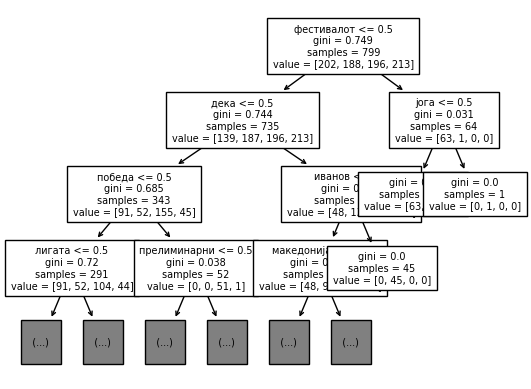

In [98]:
tree.plot_tree(classifier, max_depth=3, fontsize=7, feature_names=feature_names)